# Questão 6

## Aproxime a $g(x) = αx^{2}$  dos dados da Tabela 2, utilizando para isso o Método dos Mínimos Quadrados.

| x | -1,000 | -0,750 | -0,600 | -0,500 | -0,300 | 0,000 | 0,200 | 0,400 | 0,500 | 0,700 | 1,000 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| f(x) | 2,050 | 1,153 | 0,450 | 0,400 | 0,500 | 0,000 | 0,200 | 0,600 | 0,512 | 1,200 | 2,050 |

### <div align="center">Tabela 2: Dados.</div>

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np
import scipy.linalg as spla
import statistics

In [13]:
x_sample = np.array([-1.000, -0.750, -0.600, -0.500, -0.300 ,0.000, 0.200, 0.400, 0.500, 0.700, 1.000])
y_sample = np.array([2.050, 1.153, 0.450, 0.400, 0.500, 0.000, 0.200, 0.600, 0.512, 1.200, 2.050])

print(x_sample)
print(y_sample)

[-1.   -0.75 -0.6  -0.5  -0.3   0.    0.2   0.4   0.5   0.7   1.  ]
[2.05  1.153 0.45  0.4   0.5   0.    0.2   0.6   0.512 1.2   2.05 ]


In [71]:
def mmq(x, y):
    g1_x = x
    
    g1_x_g1_x = (g1_x**2) * (g1_x**2)
    
    f_x_g1_x = y * g1_x**2
    
    soma_g1_x_g1_x = (np.sum(g1_x_g1_x))
    soma_f_x_g1_x = np.sum(f_x_g1_x)

    a = soma_f_x_g1_x / soma_g1_x_g1_x
    
    return(a)

In [72]:
a = mmq(x_sample, y_sample) #resolvendo MMQ

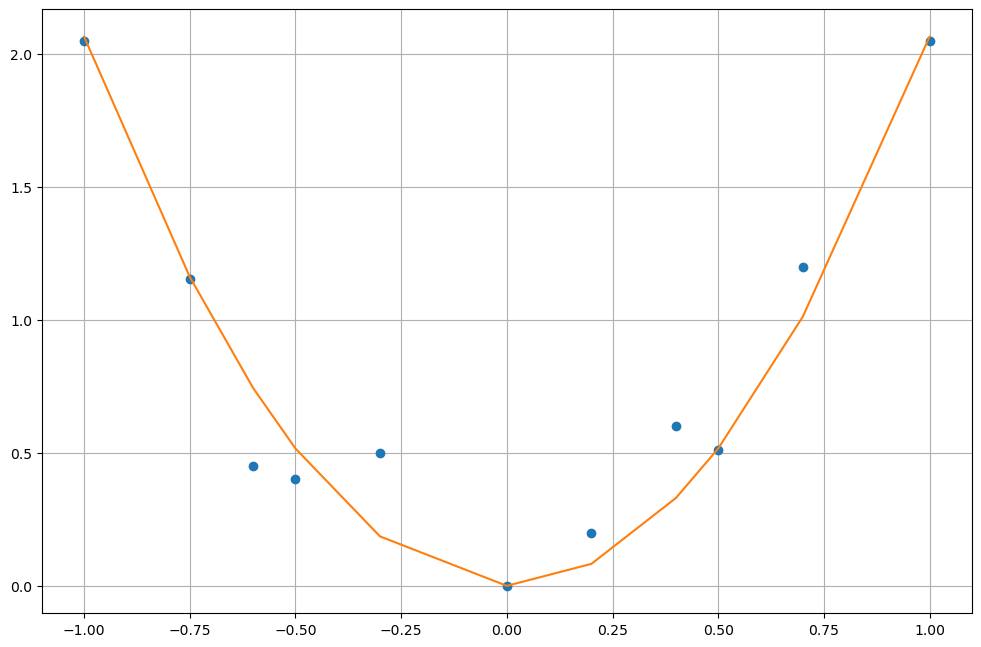

In [73]:
fig = plt.figure(figsize=(12,8), dpi= 100)
ax = plt.axes()
x = x_sample
y = a*x**2

plt.plot(x_sample, y_sample, 'o');
plt.plot(x, y);

plt.grid()
plt.show()

# Resposta:

In [76]:
print("A função g(x) é:")
print("g(x) = " + str(a) + " x^2")

A função g(x) é:
g(x) = 2.0642037657133443 x^2
